In [1]:
import numpy as np
import xarray as xr
from modules.crank_nicholson import crank_nicholson_1D
from modules.classes import Quantity1D, Analytic
import matplotlib.pyplot as plt
from scipy.linalg import solve, solve_banded

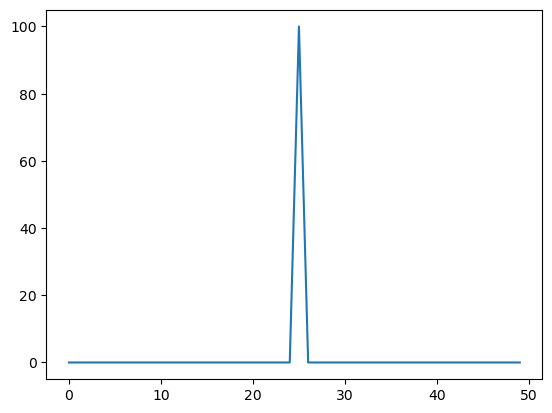

In [3]:
# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: 0.001)
diffusion.set_partial_x(lambda x, y: 0)
# Initialize the concentration object
# Note: Von Neumann Stability condition is (D * dt)/dx**2 < 0.5, else spurious decaying oscillations occur
n_grid = 20
n_time = 50
dt = 0.0001
dx = 0.001
conc = Quantity1D(
    n_grid,
    n_time,
    (0, n_grid*dx),
    (0, dt*n_time),
)
xcoords = conc.xcoords
#initial_condition =  10*np.exp(- (10*n_grid*dx)*(xcoords - 0.5*dx*n_grid)**2)
initial_condition = np.zeros_like(xcoords)
initial_condition[n_grid//2] = 100
plt.plot(initial_condition)

In [4]:
result_ds = crank_nicholson_1D(conc, diffusion, initial_condition)

[[-1.     1.     0.    ...  0.     0.     0.   ]
 [-0.049  1.098 -0.049 ...  0.     0.     0.   ]
 [ 0.    -0.049  1.098 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  1.098 -0.049  0.   ]
 [ 0.     0.     0.    ... -0.049  1.098 -0.049]
 [ 0.     0.     0.    ...  0.    -1.     1.   ]]
[[ 0.     1.    -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049
  -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049
  -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049
  -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049
  -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049 -0.049]
 [-1.     1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098
   1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098
   1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098
   1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098  1.098
   1.098  1.098  1.098  1.098  1.098  1.098  1.098 

In [5]:
result_ds

<xarray.DataArray 'concentration' (x: 50, t: 50)> Size: 20kB
array([[ 0.00000000e+00,  7.80247713e-31,  1.75102927e-29, ...,
        -1.05955027e-09, -1.46890105e-09, -2.01782808e-09],
       [ 0.00000000e+00,  7.80247713e-31,  3.34337155e-29, ...,
         1.40235032e-10,  1.93253066e-10,  2.63957926e-10],
       [ 0.00000000e+00,  1.67036704e-29,  6.99831017e-28, ...,
         1.80238915e-09,  2.47503907e-09,  3.36906836e-09],
       ...,
       [ 0.00000000e+00,  3.73551656e-28,  1.49674857e-26, ...,
         9.14012029e-09,  1.23209116e-08,  1.64699391e-08],
       [ 0.00000000e+00,  1.74490287e-29,  7.15782488e-28, ...,
         7.16390282e-10,  9.69006140e-10,  1.29959045e-09],
       [ 0.00000000e+00,  1.74490287e-29,  3.59679861e-28, ...,
        -5.48008955e-09, -7.45472387e-09, -1.00523150e-08]])
Coordinates:
  * x        (x) float64 400B 0.0 0.00102 0.002041 ... 0.04796 0.04898 0.05
  * t        (t) float64 400B 0.0 0.000102 0.0002041 ... 0.004796 0.004898 0.005
Attributes:
    dx:                      0.0010204081632653062
    dt:                      0.00010204081632653062
    n_grid:                  50
    n_time:                  50
    initial_condition:       [  0.   0.   0.   0.   0.   0.   0.   0.   0.   ...
    sources:                 0
    diffusion_coefficients:  0.001
    metadata:                Generated by crank_nicholson_1D

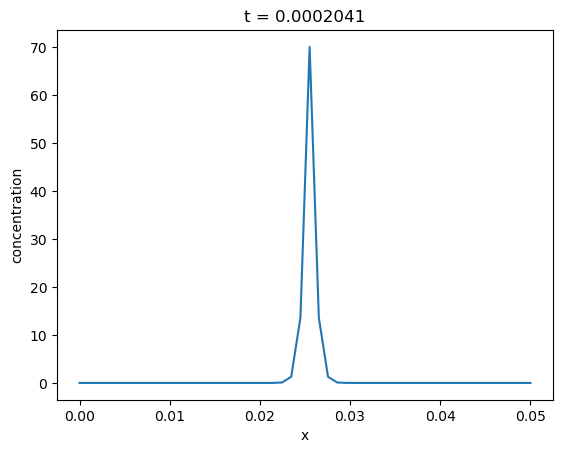

In [6]:
result_ds.isel(t=2).plot()

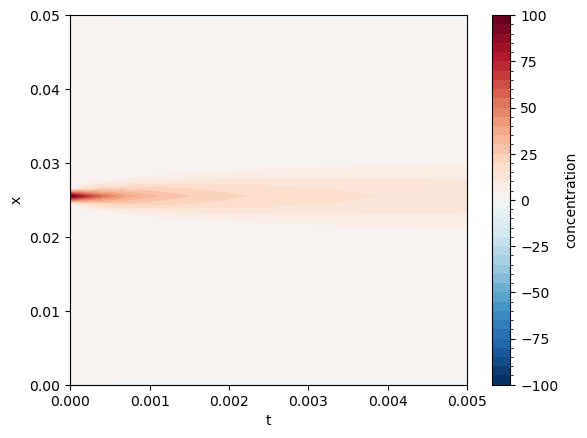

In [7]:
result_ds.plot.contourf(levels=50)